# Introduction

An oversight agency requests a service to assess greenhouse gas emissions in the Brazilian territory. Considering some questions posed by the agency, tables and visualizations can be created to answer them.

The agency wants only the emission data inside the national inventory system. On the SEEG website, one can find the info regarding emission, removal, NCI, and bunkers.

Emissions are based on the quantity of greenhouse emitted by certain entities and removal is the opposite.

NCI are those entities not contemplated inside the national inventory. Those must be removed.

Bunkers are emissions based on transport, so they are not considered as part of the emissions in each state of the country. Those will also be removed.

## Cleaning the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name="GEE Estados")

C:\Users\Gustavo Fortunato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
data["Emissão / Remoção / Bunker"].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Instead of removing each unique category inside the column, one will select the Emissions.

In [3]:
data = data[data["Emissão / Remoção / Bunker"] == "Emissão"]
data

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


# Adjusting the data

Now that only emissions are in the data, the years could be a single column.

In [4]:
columns_info = list(data.loc[:, 'Nível 1 - Setor':'Produto'].columns)
columns_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Emissão / Remoção / Bunker',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [5]:
years = list(data.loc[:, 1970:2021].columns)
print(years[:5], years[-5:])

[1970, 1971, 1972, 1973, 1974] [2017, 2018, 2019, 2020, 2021]


In [6]:
data_adjusted = data.melt(id_vars= columns_info, value_vars=years, var_name='Ano', value_name='Emissão')
data_adjusted.drop(data_adjusted.columns[6], axis=1, inplace=True)

#uncomment the code bellow to create a 740mb csv file of the data adjusted to use in other applications like PowerBi

#data_adjusted.to_csv("Data adjusted.csv", index=False)

The next task will be finding what are the most emitted green house gases.

## Most emitted gases

Now that the data is transformed into a long table, some information is repeated between the industries and other entities that emit certain gases.

In [7]:
gas_emitions = data_adjusted.groupby('Gás')[['Emissão']].sum(numeric_only=True).sort_values('Emissão', ascending=False)

The gas emissions of CO2 corresponds to $99.74% of the total gas emissions from 1972 until 2021 in Brazil


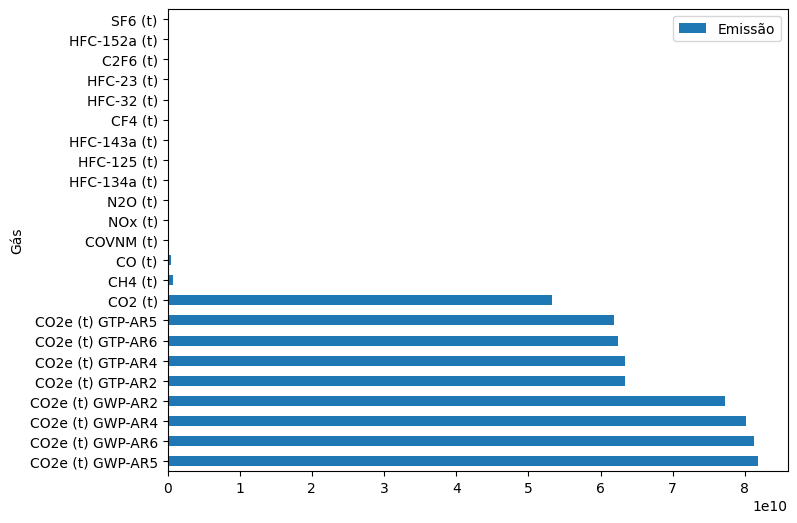

In [8]:
gas_emitions.plot(kind='barh', figsize = (8,6))
print(f'The gas emissions of CO2 corresponds to ${float(((gas_emitions.iloc[0:9].sum())/gas_emitions.sum())*100):.2f}% of the total gas emissions from 1972 until 2021 in Brazil')


## What is the activity that emits more?


<Axes: ylabel='Nível 1 - Setor'>

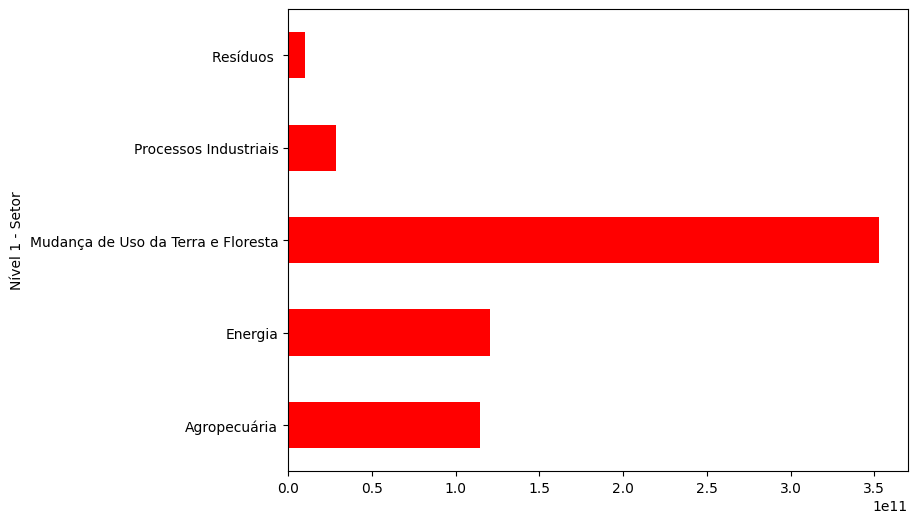

In [9]:
gas_emitions_by_sector = data_adjusted.groupby('Nível 1 - Setor')['Emissão'].sum()
gas_emitions_by_sector.plot(kind='barh', figsize = (8,6), color='red')

## What are the 5 states that emits more?

<Axes: ylabel='Estado'>

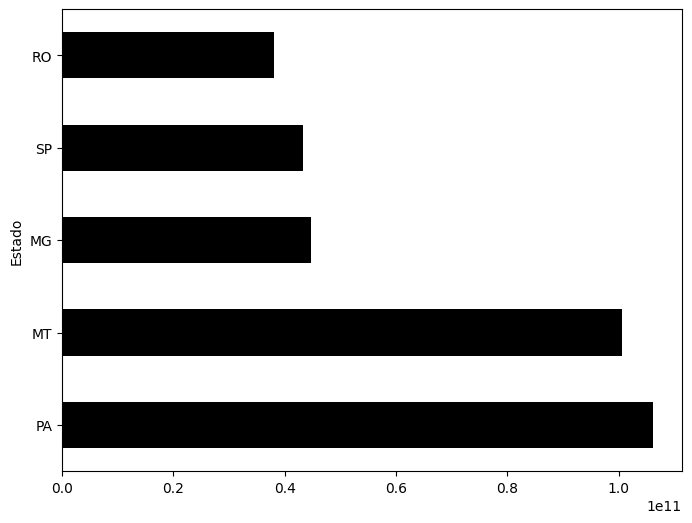

In [10]:
gas_emitions_by_state = data_adjusted.groupby('Estado')['Emissão'].sum().sort_values(ascending=False)
gas_emitions_by_state.head().plot(kind='barh', figsize = (8,6), color='black')

In [11]:
data_top_5_states = data_adjusted[data_adjusted["Estado"].isin([ "RO", "SP", "MG","MT","PA"])]
gas_emitions_by_sector_in_states = data_top_5_states[['Nível 1 - Setor','Estado', 'Emissão']].groupby(by=['Estado', 'Nível 1 - Setor']).sum().reset_index()
gas_emitions_by_sector_in_states


,Estado,Nível 1 - Setor,Emissão
0,MG,Agropecuária,1.445325e+10
1,MG,Energia,9.663844e+09
2,MG,Mudança de Uso da Terra e Floresta,1.262467e+10
3,MG,Processos Industriais,6.806110e+09
4,MG,Resíduos,1.111180e+09
5,MT,Agropecuária,1.135902e+10
6,MT,Energia,2.296983e+09
7,MT,Mudança de Uso da Terra e Floresta,8.670222e+10
8,MT,Processos Industriais,9.726890e+07
9,MT,Resíduos,1.368172e+08


<Axes: xlabel='Estado', ylabel='Emissão'>

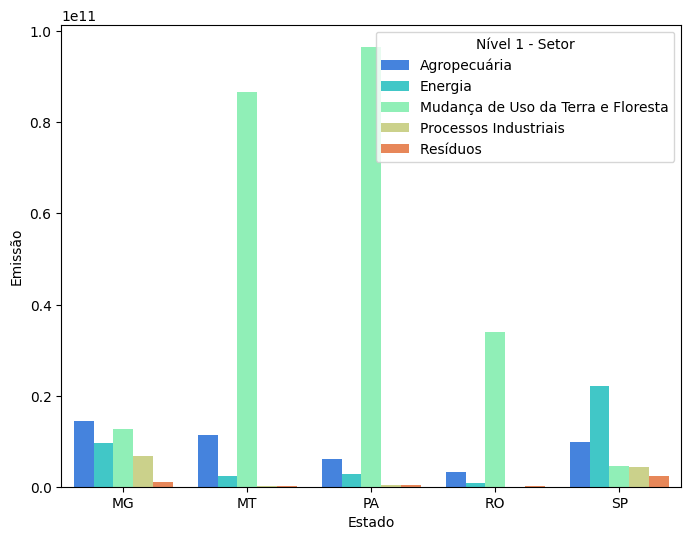

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x='Estado', y="Emissão", data=gas_emitions_by_sector_in_states, palette='rainbow', hue='Nível 1 - Setor')

The activities that emit more gases are deforestation in the states of MT, PA, and RO, and agriculture in the states of MG, followed by Energy in the state of SP.

# What are the most emitted gases by activity?

In [13]:
most_emitted_gases_by_activity = data_adjusted[['Gás','Nível 1 - Setor', 'Emissão']].groupby(by=['Gás', 'Nível 1 - Setor']).sum()
most_emitted_gases_by_activity_values = most_emitted_gases_by_activity.swaplevel(0,1).groupby(level=0).max().values
most_emitted_gases_by_activity_summarized = most_emitted_gases_by_activity.swaplevel(0,1).groupby(level=0).idxmax()
most_emitted_gases_by_activity_summarized.insert(1, "Emissão por setor", most_emitted_gases_by_activity_values)
most_emitted_gases_by_activity_final = most_emitted_gases_by_activity_summarized.reset_index()
most_emitted_gases_by_activity_final.columns = ['Setor', 'Setor e Gás', 'Emissão']
most_emitted_gases_by_activity_final

,Setor,Setor e Gás,Emissão
0,Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)",2.184388e+10
1,Energia,"(Energia, CO2e (t) GWP-AR6)",1.385259e+10
2,Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",4.051523e+10
3,Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)",3.352064e+09
4,Resíduos,"(Resíduos , CO2e (t) GWP-AR5)",2.310099e+09


<Axes: xlabel='Emissão', ylabel='Setor e Gás'>

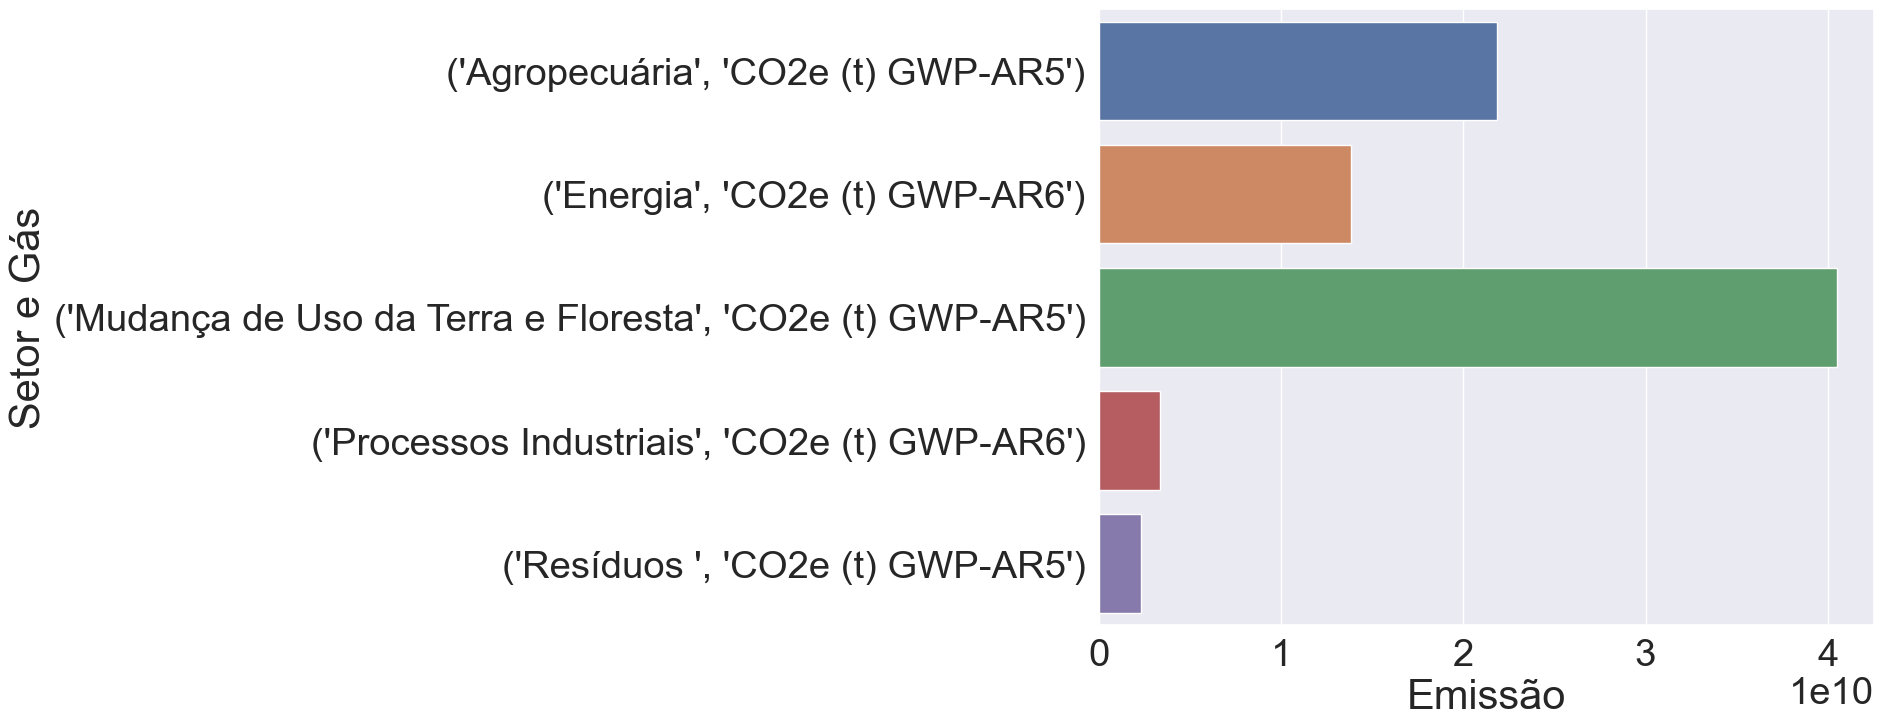

In [14]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale=2.5)
sns.barplot(y='Setor e Gás', x='Emissão', data=most_emitted_gases_by_activity_final)


Using the horizontal barplot one can see that deforestation is the one that emits more CO2 total gases, followed by agricultural and energy activities. 

# Did the emissions increased?

<Axes: xlabel='Ano', ylabel='Emissão'>

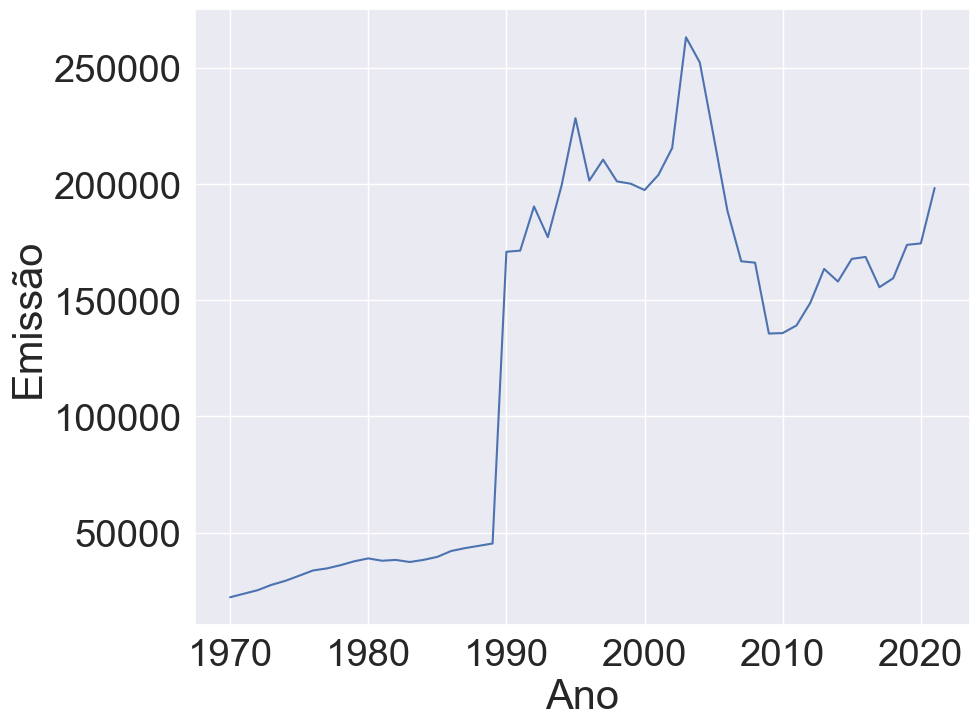

In [15]:
emissions_by_years = data_adjusted.groupby(by='Ano')[['Emissão']].mean(numeric_only=True).reset_index()
sns.lineplot(x='Ano',y='Emissão',data=emissions_by_years)

The behavior of the emissions is strange, because of the data collection, but one can see that considering only 1990 until 2003, the emissions had increased. After 2004 they decreased and now the emissions are increasing again.

## Gases by years

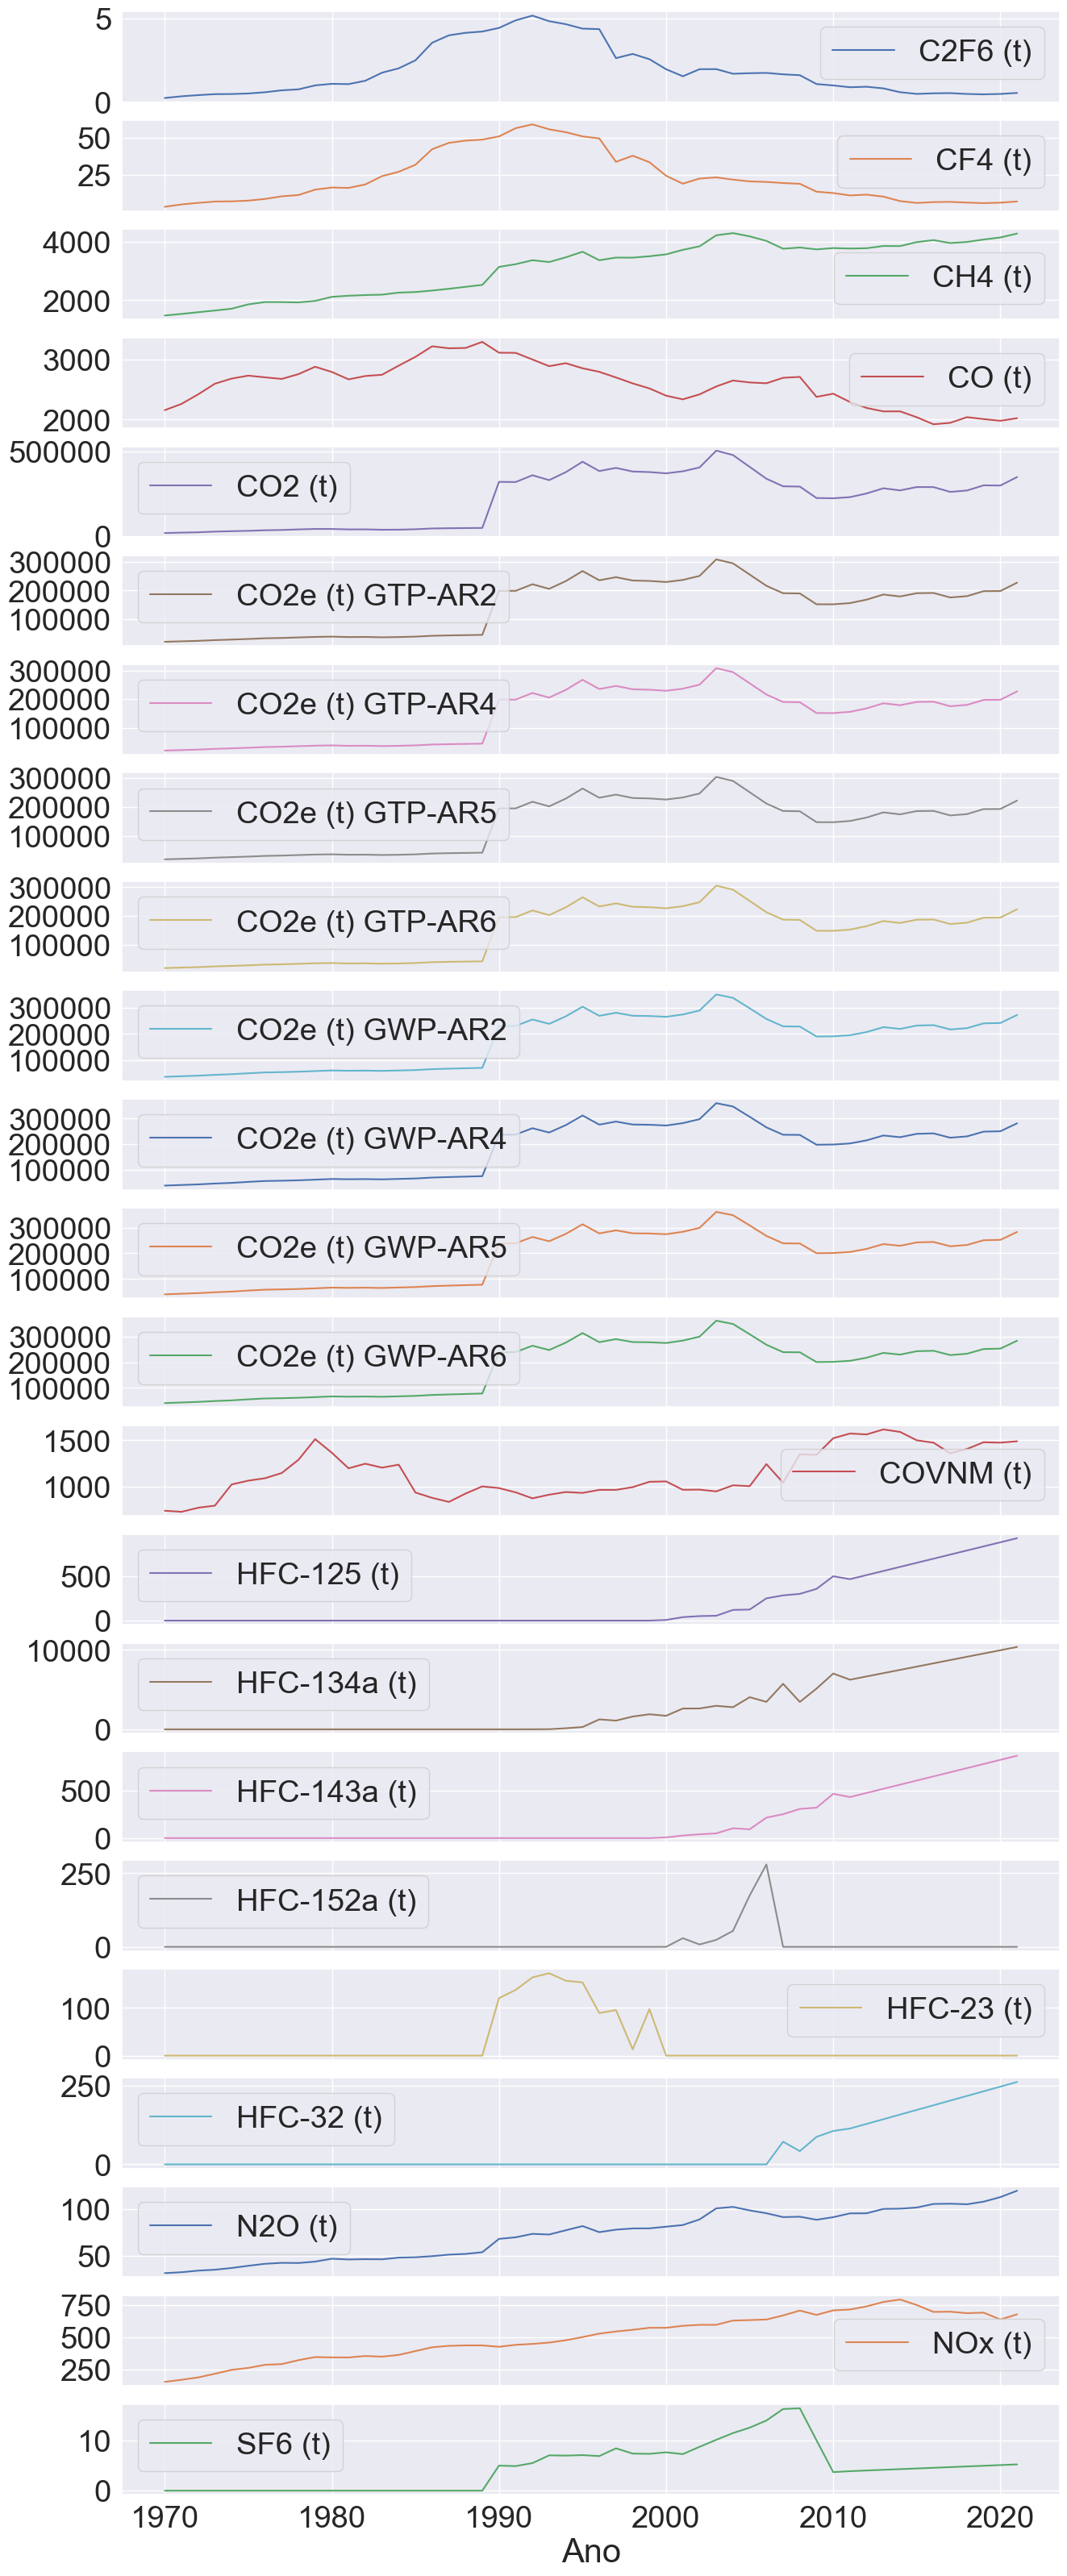

In [16]:
gas_emissions_by_years = data_adjusted.groupby(by=['Ano', 'Gás'])[['Emissão']].mean(numeric_only=True).reset_index()
gas_emissions_by_years = gas_emissions_by_years.pivot_table(index='Ano', columns='Gás', values='Emissão')
gas_emissions_by_years.plot(subplots=True, figsize=(15,40));


Some gases like CO2 had an emission behavior resembling the emission by year plot. Other gases are still increasing their emissions, like NOx, N2O, CH4, and the HFC ones. On the other hand, some gases like CO, SF6, HFC23, CF4, and C2F6  did have a decrease throughout the years. 

## Emissions by activity

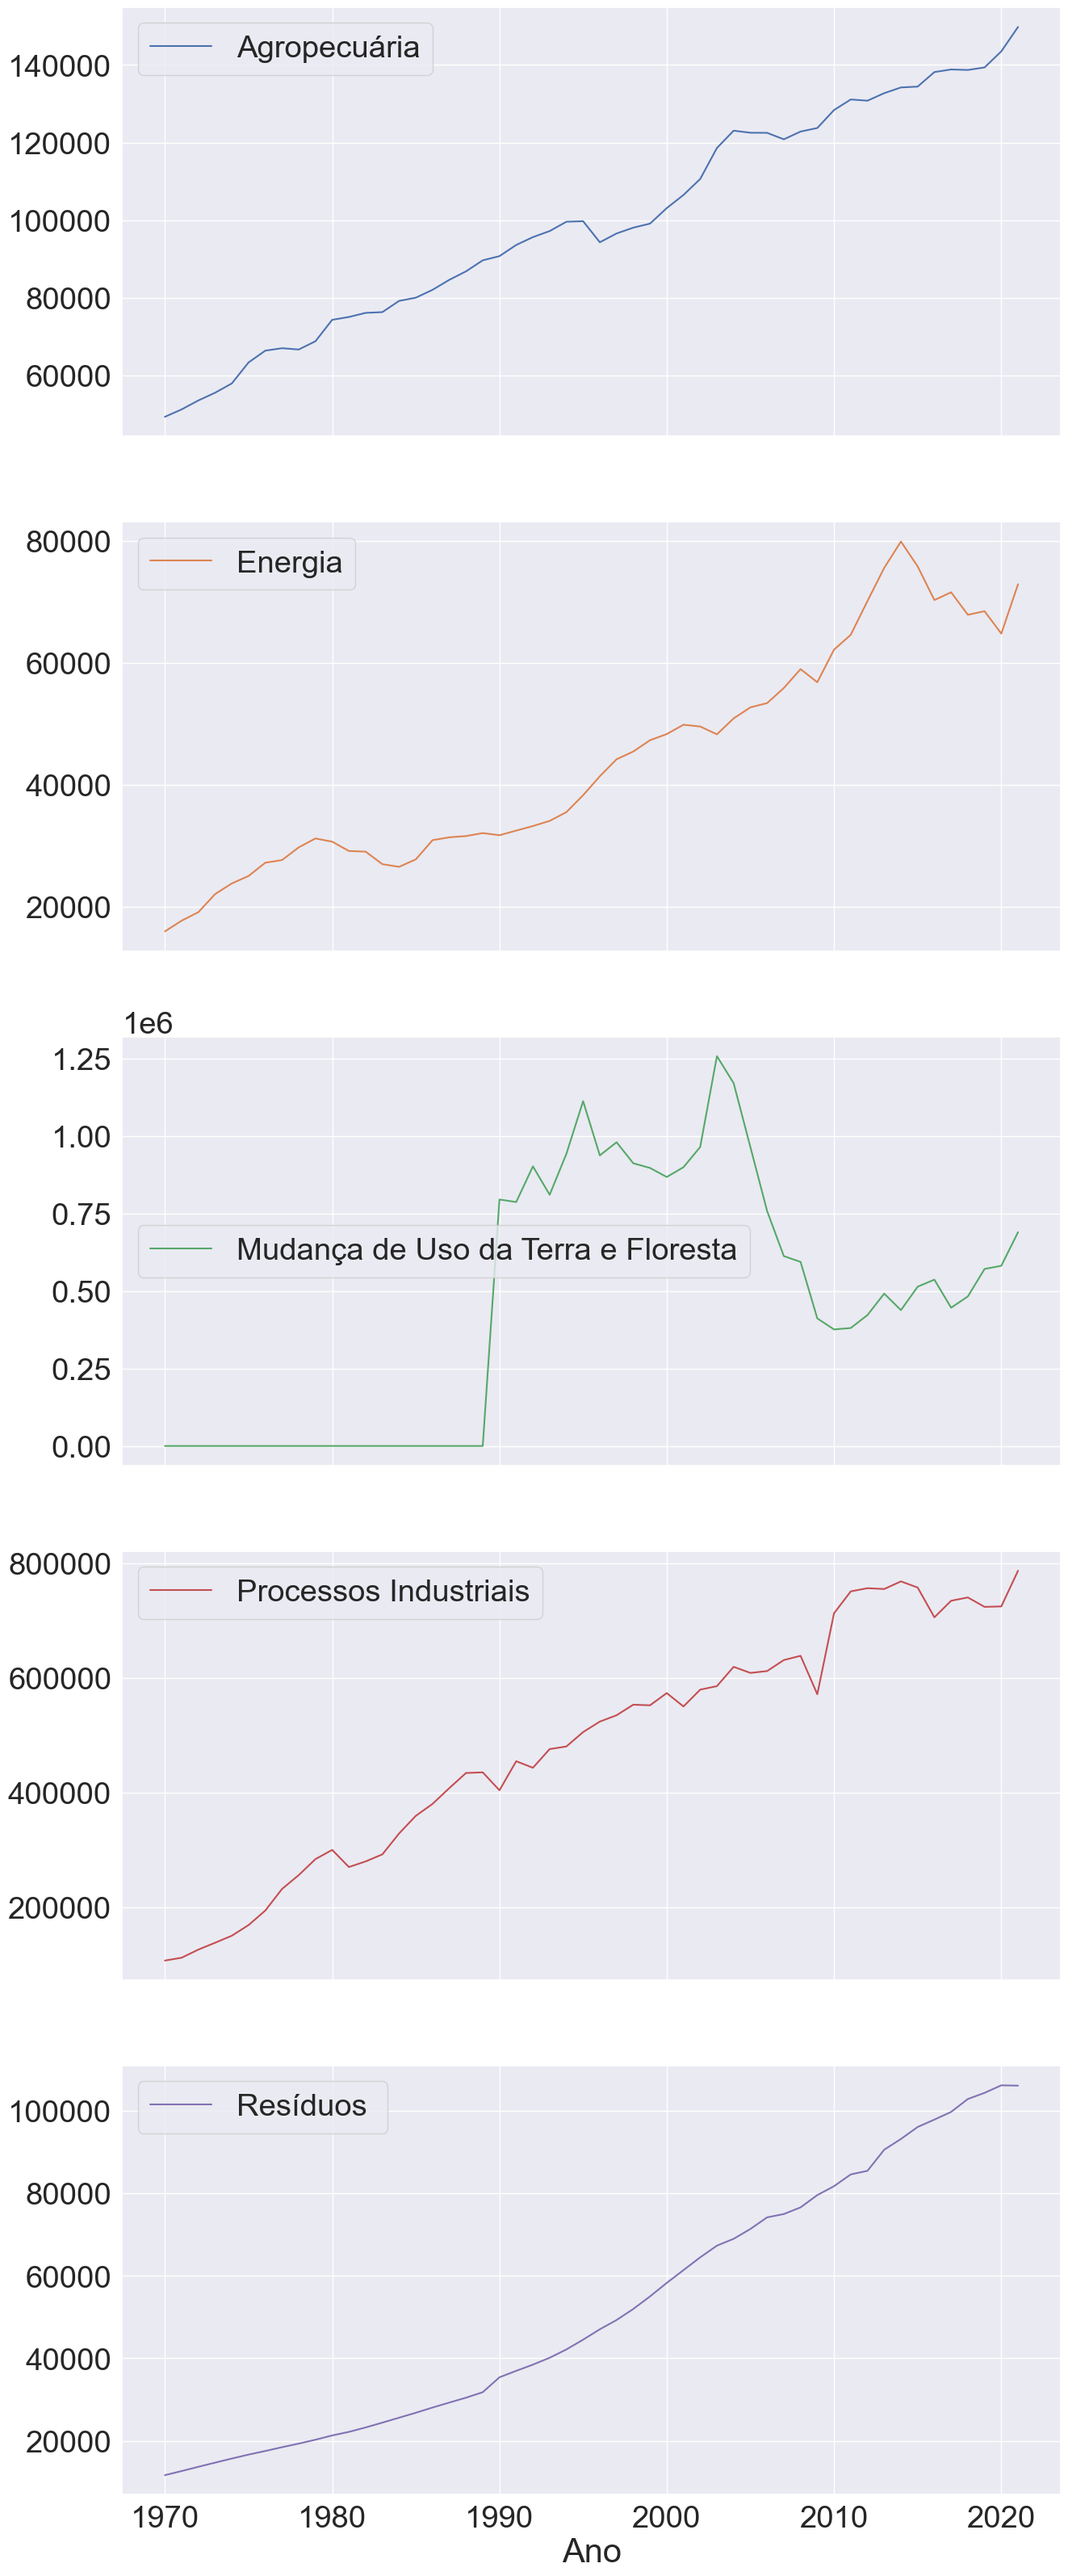

In [17]:
sector_emissions_by_years = data_adjusted.groupby(by=['Nível 1 - Setor', 'Ano'])[['Emissão']].mean(numeric_only=True).reset_index()
sector_emissions_by_years = sector_emissions_by_years.pivot_table(index='Ano', columns='Nível 1 - Setor', values='Emissão')
sector_emissions_by_years.plot(subplots=True, figsize=(15,40));

All activities are increasing their emissions. Only deforestation has a non-exponential behavior. This could be explained by the politics of sustainable development, which can affect land usage in countries with high forest areas.

# What about the estimated emissions/state population in 2022?

Since the SEEG dataset does not have the population of each state one went to the IBGE website to retrieve that data.

In [18]:
population_data = pd.read_excel('POP2022_Municipios.xls', 
    header =1, #avoiding the first non data text 
    skipfooter=34) #avoiding the 34 cells of legend bellow the data

In this dataset UF is Federal Unity, the same as state.

In [19]:
population_data.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


In [20]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   int64 
 2   COD. MUNIC         5570 non-null   int64 
 3   NOME DO MUNICÍPIO  5570 non-null   object
 4   POPULAÇÃO          5570 non-null   object
dtypes: int64(2), object(3)
memory usage: 217.7+ KB


The population column is a string, thats why it was not grouped.

One tried to convert using 
```
population_data['POPULAÇÃO'].astype(float) #and also int.
```
An Error was returnet since some of the data has the value and this string: (1). It must be eliminated first.


In [21]:
population_data = population_data.assign(population_no_parenthesis = population_data['POPULAÇÃO'].replace('\(\d{1,2}\)','', regex=True),
                       population = lambda x: x.loc[:,'population_no_parenthesis'].replace('\.','', regex=True))
population_data =population_data.astype({'population':'int64'})
population_data = population_data.groupby('UF')[['population']].sum().reset_index()
population_data

,UF,population
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


## Answering the question

In [22]:
emission_by_state = data_adjusted[data_adjusted['Ano']==2021].groupby('Estado')[['Emissão']].sum().reset_index()
emission_by_state


,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


<Axes: xlabel='Estado', ylabel='Emissions/population'>

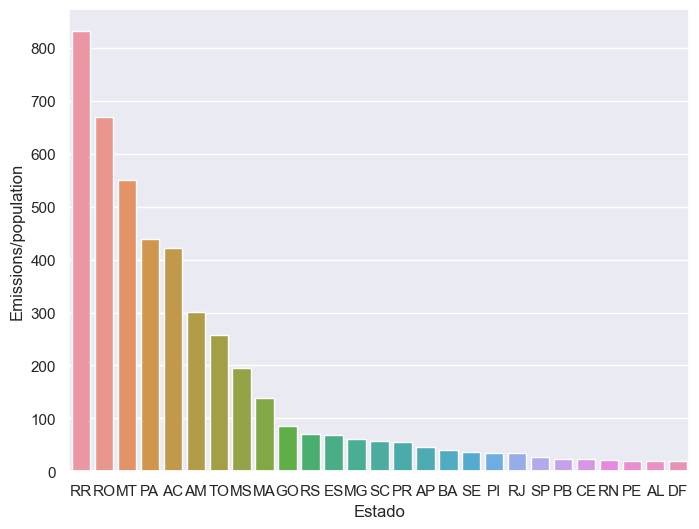

In [24]:
emission_state_merged_data = pd.merge(emission_by_state, population_data, left_on='Estado', right_on='UF')
emission_state_merged_data['Emissions/population'] = emission_state_merged_data['Emissão']/emission_state_merged_data['population']
emission_state_merged_data = emission_state_merged_data.sort_values('Emissions/population',ascending=False)


#uncomment this code to create the csv with emissions and population data
#emission_state_merged_data.to_csv('population_state_emissions_2022.csv', index=False)


sns.set(rc = {'figure.figsize':(8,6)})
sns.set(font_scale=1.0)
sns.barplot(y='Emissions/population', x='Estado', data=emission_state_merged_data)

# Conclusions

With the data obtained all the questions about greenhouse emissions from Brazil could be answered. The Agency could use the visualizations as a guide to create insights about new politics regarding the activities and states that have more gas emissions.